In [ ]:
#***************************************************************************************************************************

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<center><h1><b>Global Terrorism Analysis</b></h1>
<h3> Notebook by - Sarthak Soni</h3>
</center>

<h1>Introduction</h1>
<p>
According to Wikipedia, <i>"Terrorism is the deliberate killing of innocent people, at random, to spread fear through a whole population and force the hand of its political leaders".</i> Global terrorism is on the rise throughout the world. There are many factors associated with terrorism and studying these factors and features is integral to stopping the same. Let us try to analyse some of the features contributing to terrorism from the global terrorsim dataset.
</p>

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import folium 
from folium import plugins
from folium.plugins import HeatMap
import nltk
from nltk import *
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
import matplotlib.gridspec as gridspec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
sns.set(rc={'figure.figsize':(18,15)})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = '/content/drive/My Drive/globalterrorismdb_0718dist.csv'
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [ ]:
df = pd.read_csv(file,encoding='ISO-8859-1')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True)
df.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,Region,State,City,Latitude,Longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,Group,gsubname,gname2,gsubname2,gname3,gsubname3,Motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,Na

In [ ]:
df = df[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude',
                 'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
              
df.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Extended     181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   State        181270 non-null  object 
 6   Region       181691 non-null  object 
 7   City         181257 non-null  object 
 8   Latitude     177135 non-null  float64
 9   Longitude    177134 non-null  float64
 10  AttackType   181691 non-null  object 
 11  Killed       171378 non-null  float64
 12  Wounded      165380 non-null  float64
 13  Target       181055 non-null  object 
 14  Summary      115562 non-null  object 
 15  Group        181691 non-null  object 
 16  Target_type  181691 non-null  object 
 17  Weapon_type  181691 non-null  object 
 18  Motive       50561 non-n

In [ ]:
df.isna().sum()

Year                0
Month               0
Extended            0
Day                 0
Country             0
State             421
Region              0
City              434
Latitude         4556
Longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [ ]:
df1 = df.copy()
df1.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


<h2> Explanatory Data Analysis </h2>

[]

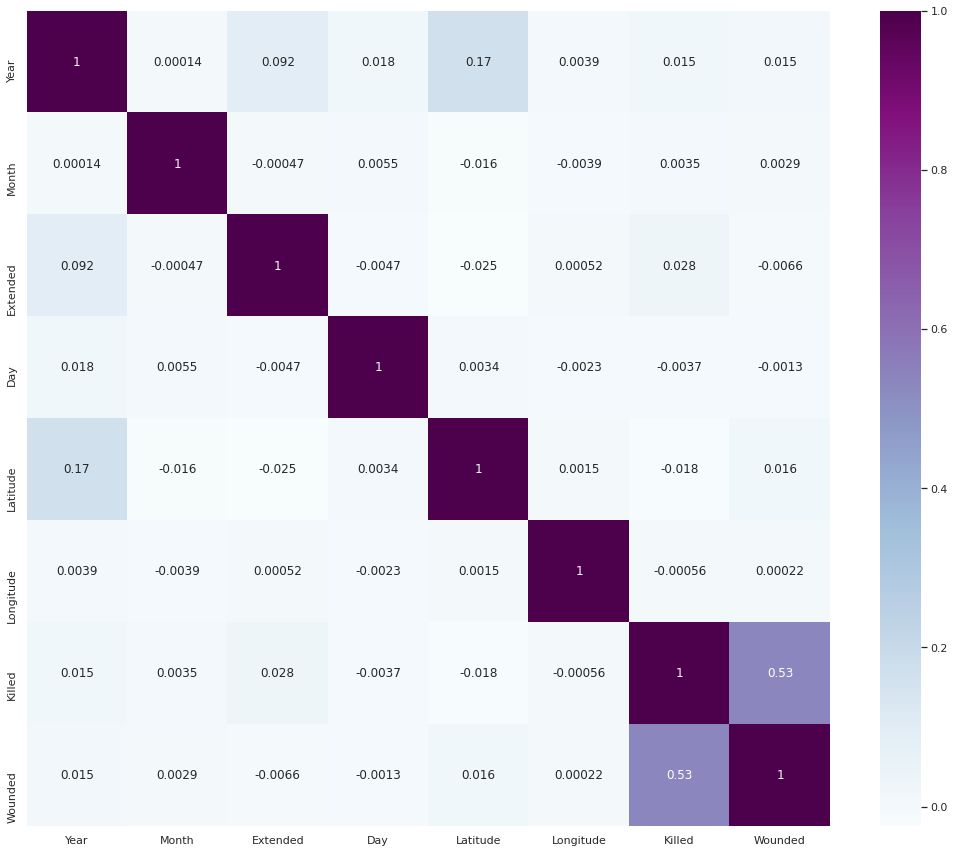

In [ ]:
sns.heatmap(df1.corr(),annot=True,cmap="BuPu")
plt.plot()

Except Killed and Wounded, there seems to be almost no correlation at all.

Lets look at some basic facts from the dataset

In [ ]:
print("Country with the most attacks:",df1['Country'].value_counts().idxmax())
print("City with the most attacks:",df1['City'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",df1['Region'].value_counts().idxmax())
print("Year with the most attacks:",df1['Year'].value_counts().idxmax())
print("Month with the most attacks:",df1['Month'].value_counts().idxmax())
print("Group with the most attacks:",df1['Group'].value_counts().index[1])
print("Most Attack Types:",df1['AttackType'].value_counts().idxmax())
print('Maximum people killed in an attack are:',df1['Killed'].max(),'that took place in',df1.loc[df1['Killed'].idxmax()].Country)

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion
Maximum people killed in an attack are: 1570.0 that took place in Iraq


<h3> Most people kiiled by country </h3>

[]

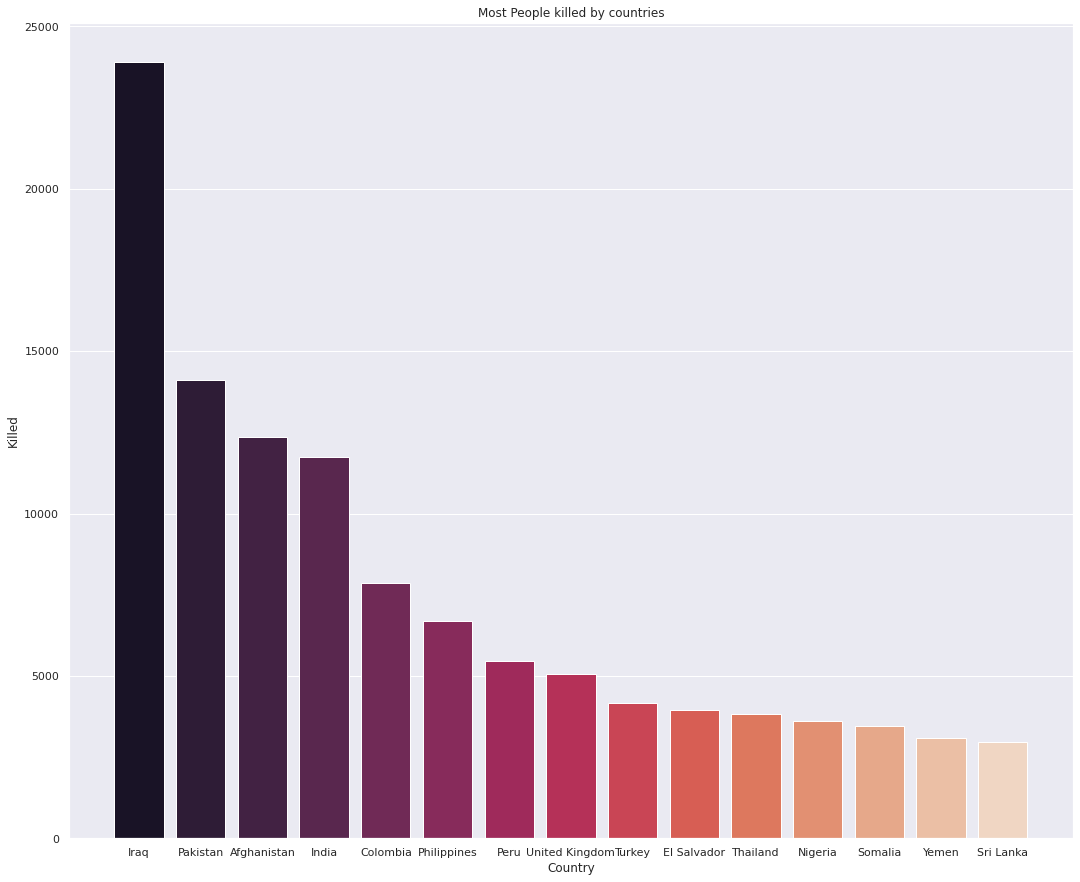

In [ ]:
country_killed = df1.groupby('Country')['Killed'].count()
country_killed = country_killed.sort_values(ascending=False)[:15]
sns.barplot(x=country_killed.index,y=country_killed,palette='rocket')
plt.title('Most People killed by countries')
plt.plot()

So most people are killed in Iraq followed by Pakistan, Afghanistan and India.

<h3> Terrorist activities over the years</h3>

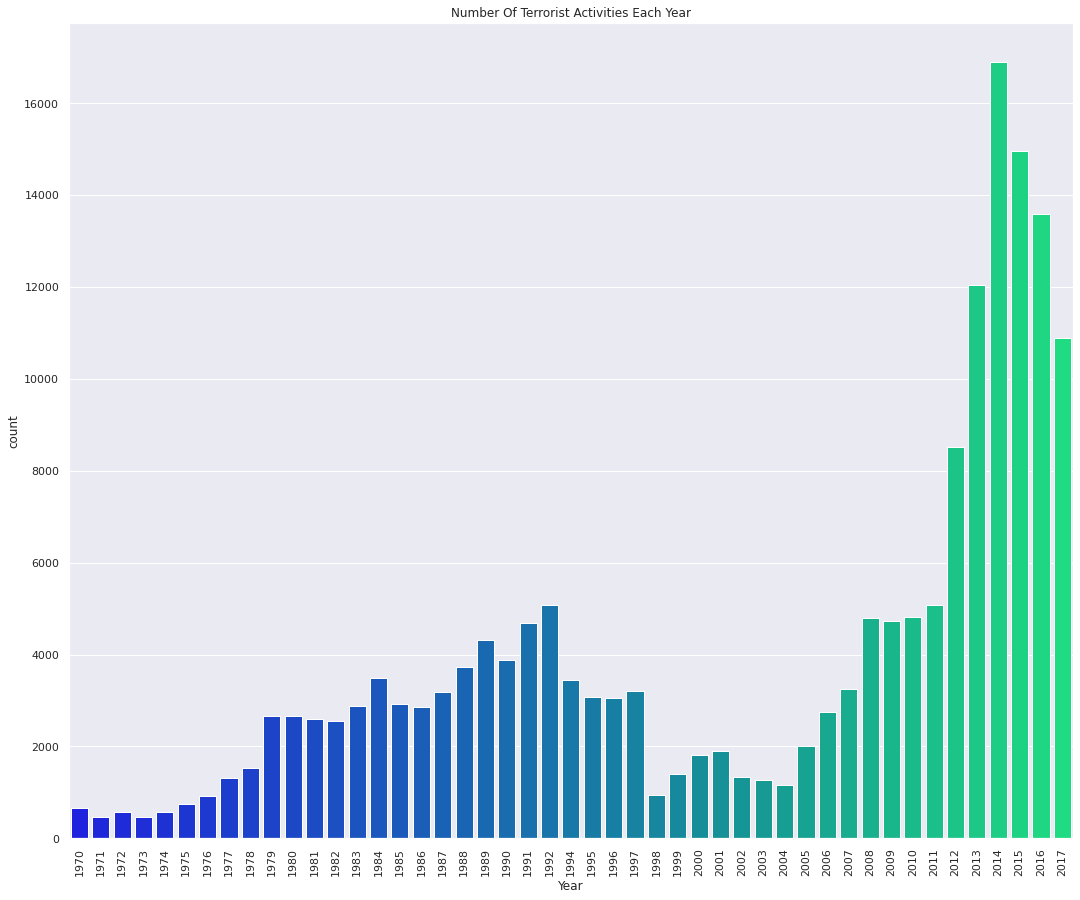

In [ ]:
sns.countplot(x='Year',data=df1,palette='winter')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

As the years go by, terrorism has only increased or it could be that our dataset contains more observations from the later years.

In [ ]:
df1['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

<h3> Terrorist activities over the years by region </h3>

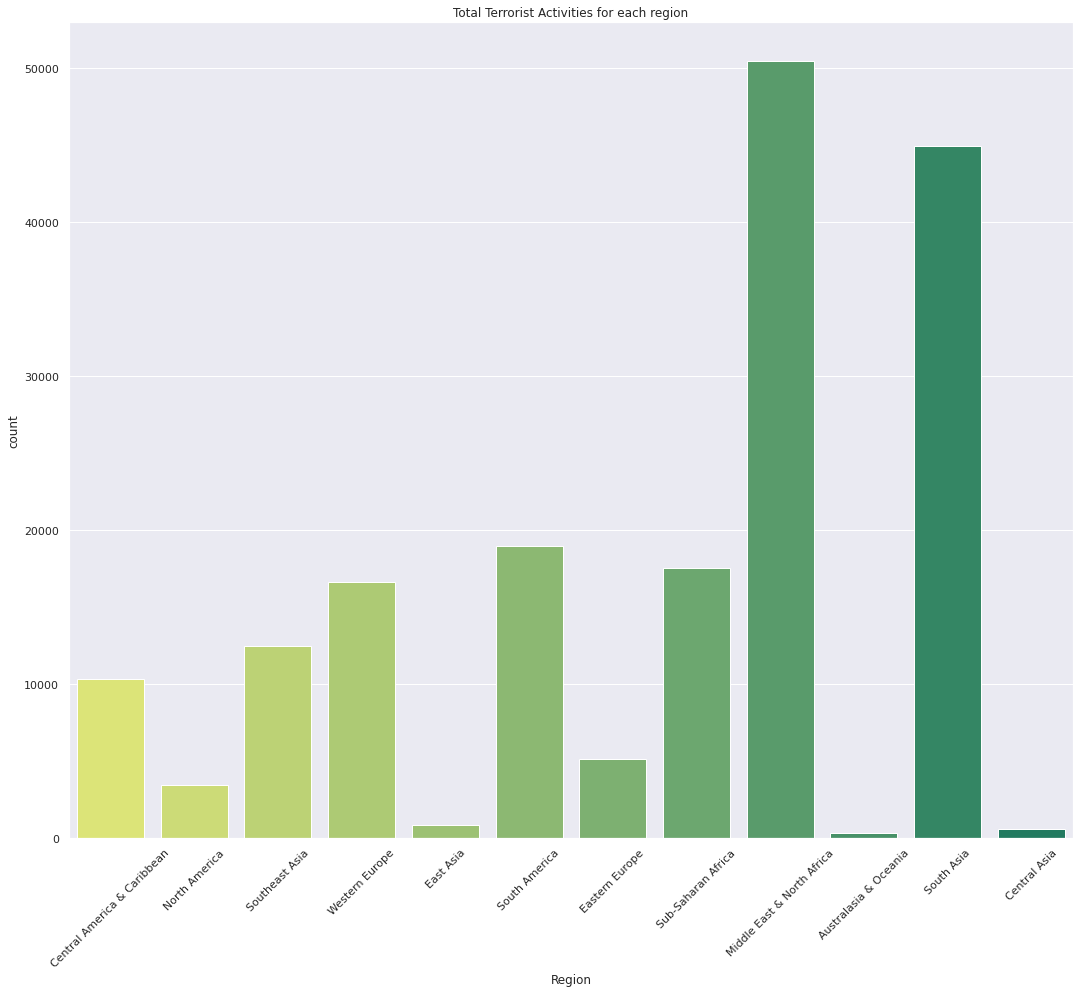

In [ ]:
sns.countplot(x='Region',data=df1,palette='summer_r')
plt.xticks(rotation=45)
plt.title('Total Terrorist Activities for each region')
plt.show()

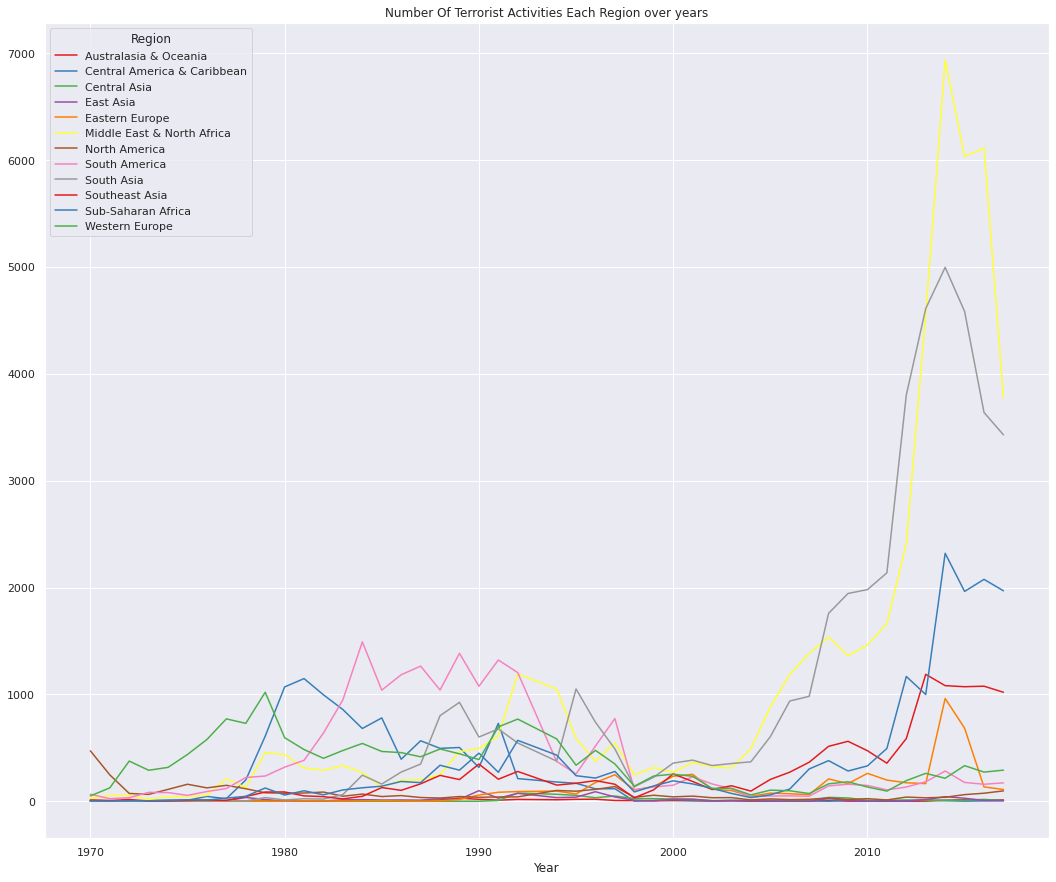

In [ ]:
rcount = pd.crosstab(df1.Year,df1.Region)
rcount.plot(color=sns.color_palette('Set1',12))
plt.title('Number Of Terrorist Activities Each Region over years')
plt.show()

The middle East(which contains Iraq and Afghanistan) and North Africa along with South Asia contains most crimes. It is interesting to note that these regions comprise mostly of underdeveloped and developing nations. 

Lets take a look at the most active terror groups

In [ ]:
df1['Group'].value_counts()[:10]

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64

Most groups are undocumented but Taliban is responsible for most documented cases.

<h3> Most common attack types </h3>

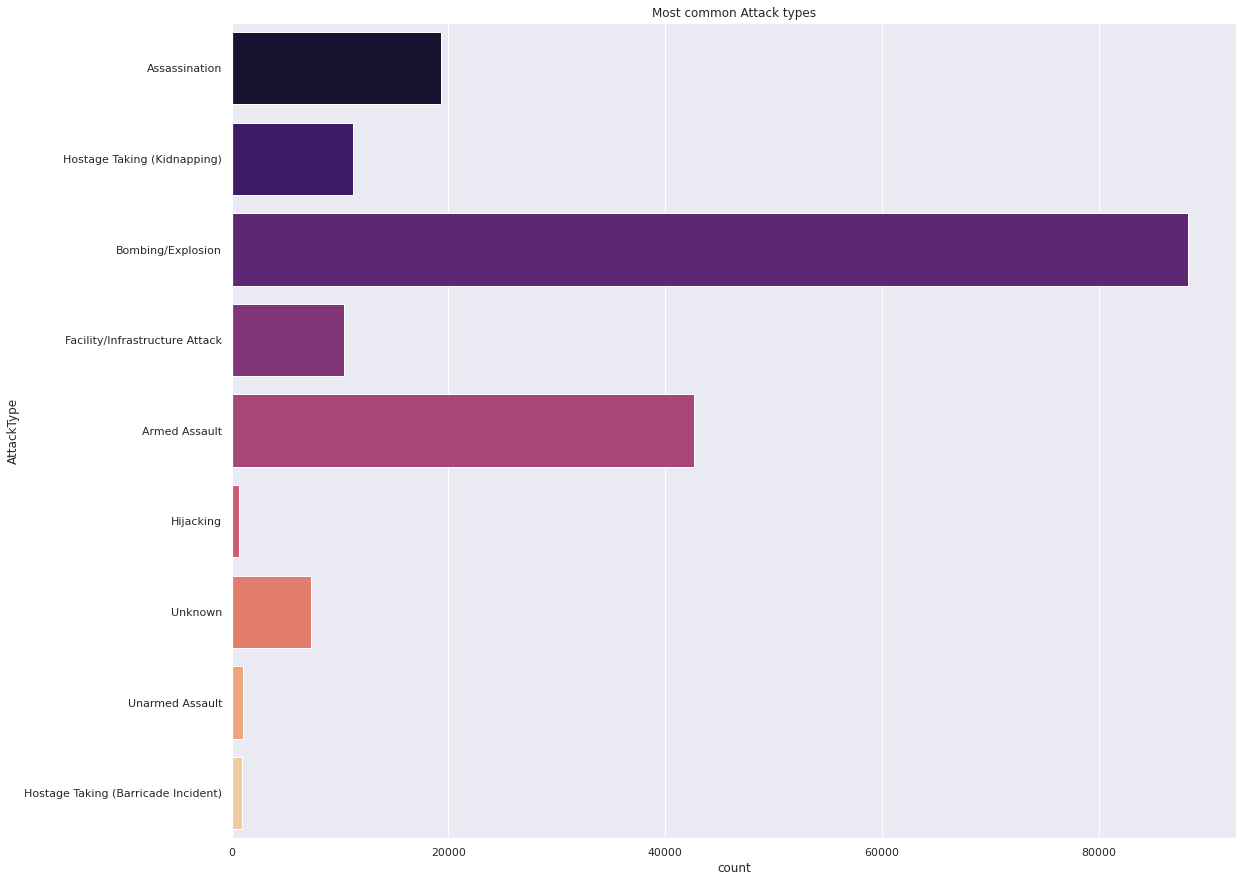

In [ ]:
sns.countplot(y='AttackType',data=df1,palette='magma')
plt.title('Most common Attack types')
plt.show()

Bombing and Explosions have been the most common Attack type

<h3> Most common weapon types </h3>

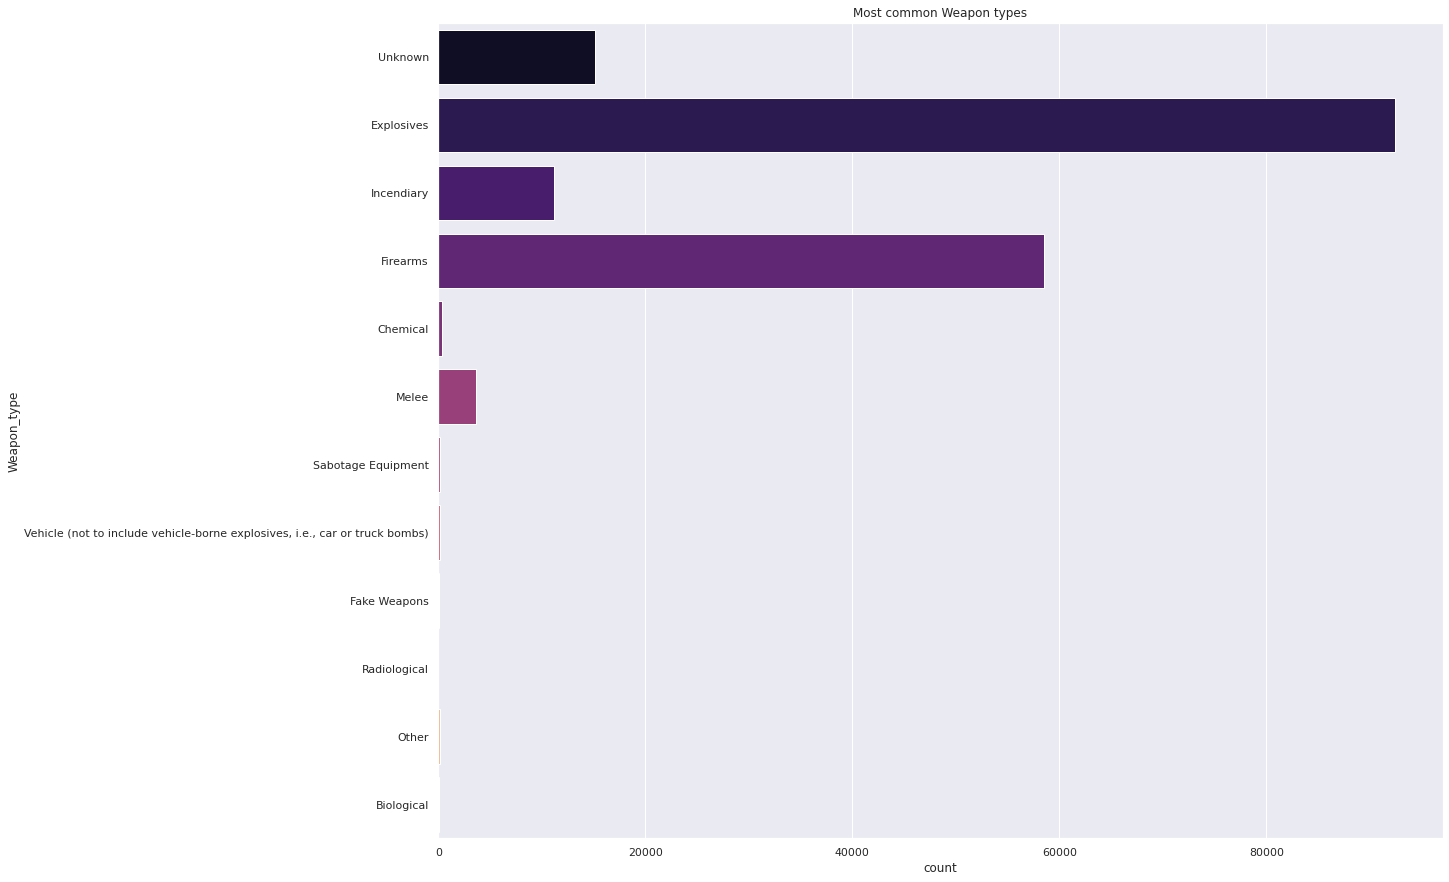

In [ ]:
sns.countplot(y='Weapon_type',data=df1,palette='magma')
plt.title('Most common Weapon types')
plt.show()

As concluded, explosives are the most common weapon 

<h3> Most people killed by terrorist groups </h3>

[]

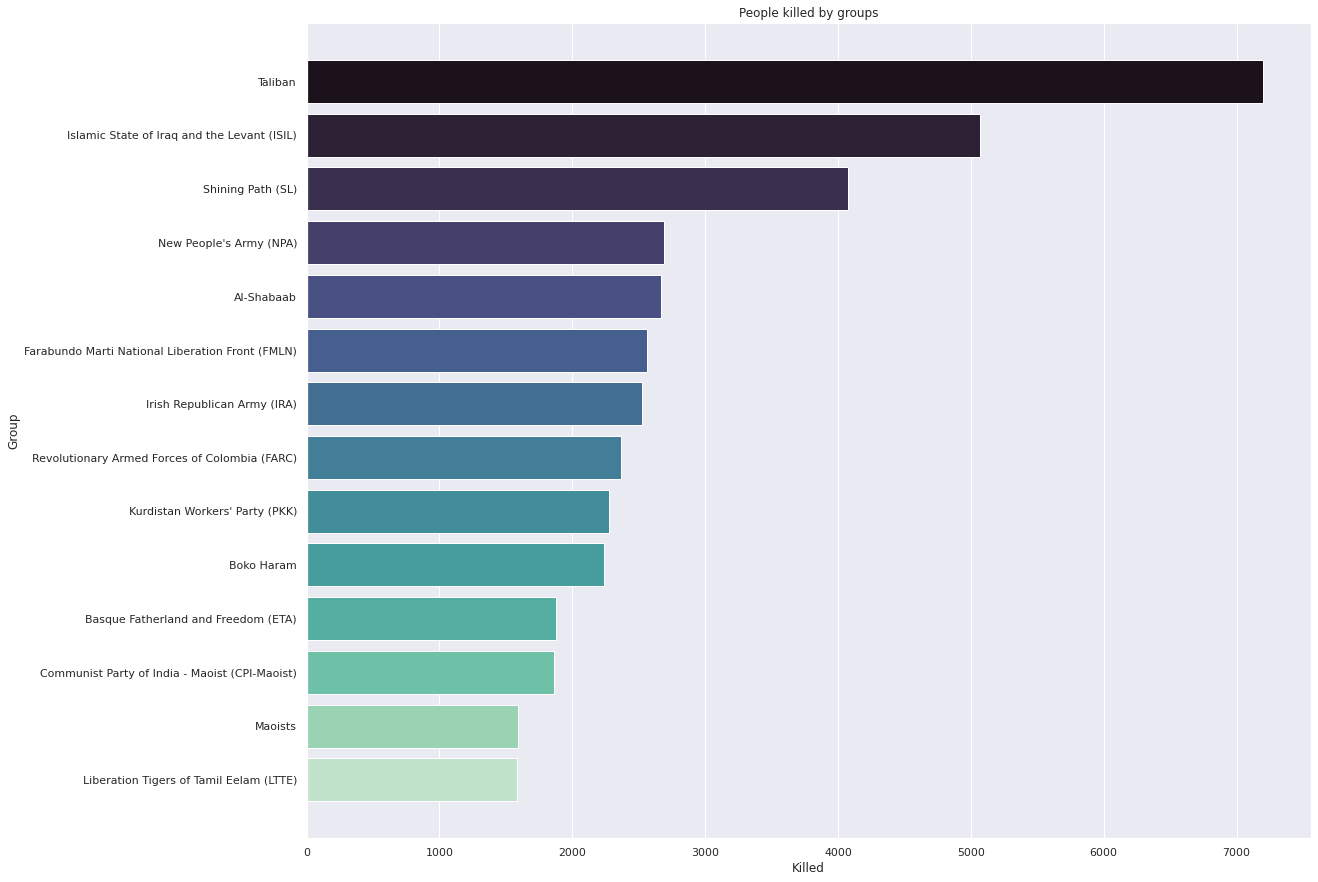

In [ ]:
group_killed = df1.groupby('Group')['Killed'].count().sort_values(ascending=False)
group_killed = group_killed[1:15]
sns.barplot(y=group_killed.index,x=group_killed,palette='mako')
plt.title('People killed by groups')
plt.plot()

ISIL and Taliban seems responsible for most killings.

<h3> Most common target types</h3>


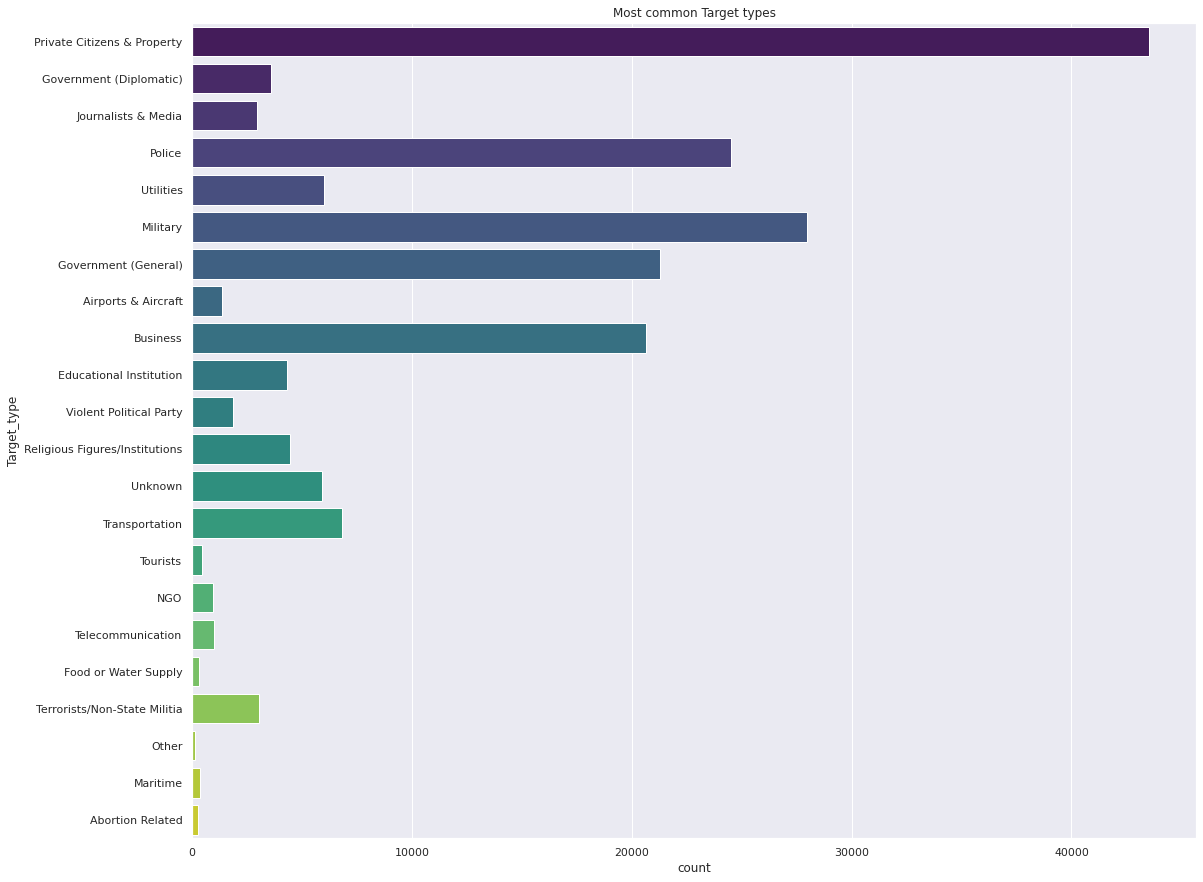

In [ ]:
sns.countplot(y='Target_type',data=df1,palette='viridis')
plt.title('Most common Target types')
plt.show()

Private Property, Citizens, Governments and businesses are the most common targets for terrorist organisations.

<h4> Plotting attacks on citizens and private property on World map.

In [ ]:
terror_filter = df1[df1['Target_type'] == "Private Citizens & Property"]
terror_count = terror_filter.groupby(['Country'])['Target_type'].count()
countries = pd.DataFrame({'country':terror_count.index,'number':terror_count.values })
data = [dict(
    type='choropleth',
    locations=countries['country'],
    locationmode='country names',
    z=countries['number'],
    text=countries['country'],
    colorscale='magma_r',
    #reversescale=True,
    marker=dict(line=dict(color='rgb(180,180,180)', width=0.9)),
    colorbar = {'title': 'No of incidents'},
    
)]
layout = dict(
    title='No of incidents across the world to disrupt Private Citizens & Property',autosize=True,
           # width=1000, height=700,
    geo=dict(showframe=False,  projection=dict(type='mercator'),)
    
)
fig = go.Figure(data=data, layout=layout)

fig.update_layout(height=700, margin={"r":1,"t":0,"l":0,"b":0})
iplot(fig)

Most number of civilians are targeted in Iraq, India, Pakistan and Afghanistan.

<h4> Plotting attacks on Governments World map </h4>

In [ ]:
terror_filter = df1[df1['Target_type'] == "Government (General)"]
terror_filter = terror_filter.groupby(['Country'])['Target_type'].count()
data =  dict(
        type = 'choropleth',
        locations = terror_filter.index,
        locationmode = 'country names',
        z = terror_filter.values,
        text = terror_filter.index,
        colorscale='inferno',
        reversescale=True,
        marker=dict(line=dict(color='rgb(180,180,180)', width=0.5)),
        colorbar = {'title': 'No of incidents'})

layout = dict( title = 'Number of attacks on Governments',
         geo = dict(showframe = False,
         projection = {'type' : 'mercator'}))

choromap = go.Figure(data = [data],layout=layout)
choromap.update_layout(height=700, margin={"r":1,"t":0,"l":0,"b":0})

iplot(choromap)

and again, the same countries top the list.

<h4>Plotting people killed by countries on World map </h4>

In [ ]:
#terror_filter = df1['Killed']
terror_filter = df1.groupby(['Country'])['Killed'].count()
data =  dict(
        type = 'choropleth',
        locations = terror_filter.index,
        locationmode = 'country names',
        z = terror_filter.values,
        text = terror_filter.index,
        colorscale='inferno',
        reversescale=True,
        marker=dict(line=dict(color='rgb(180,180,180)', width=0.5)),
        colorbar = {'title': 'No of incidents'})

layout = dict( title = 'No of casualties by Countries',
         geo = dict(showframe = False,
         projection = {'type' : 'mercator'}))

choromap = go.Figure(data = [data],layout=layout)
choromap.update_layout(height=700, margin={"r":1,"t":0,"l":0,"b":0})

iplot(choromap)

<h3> Most common cities for terrorist attacks</h3>

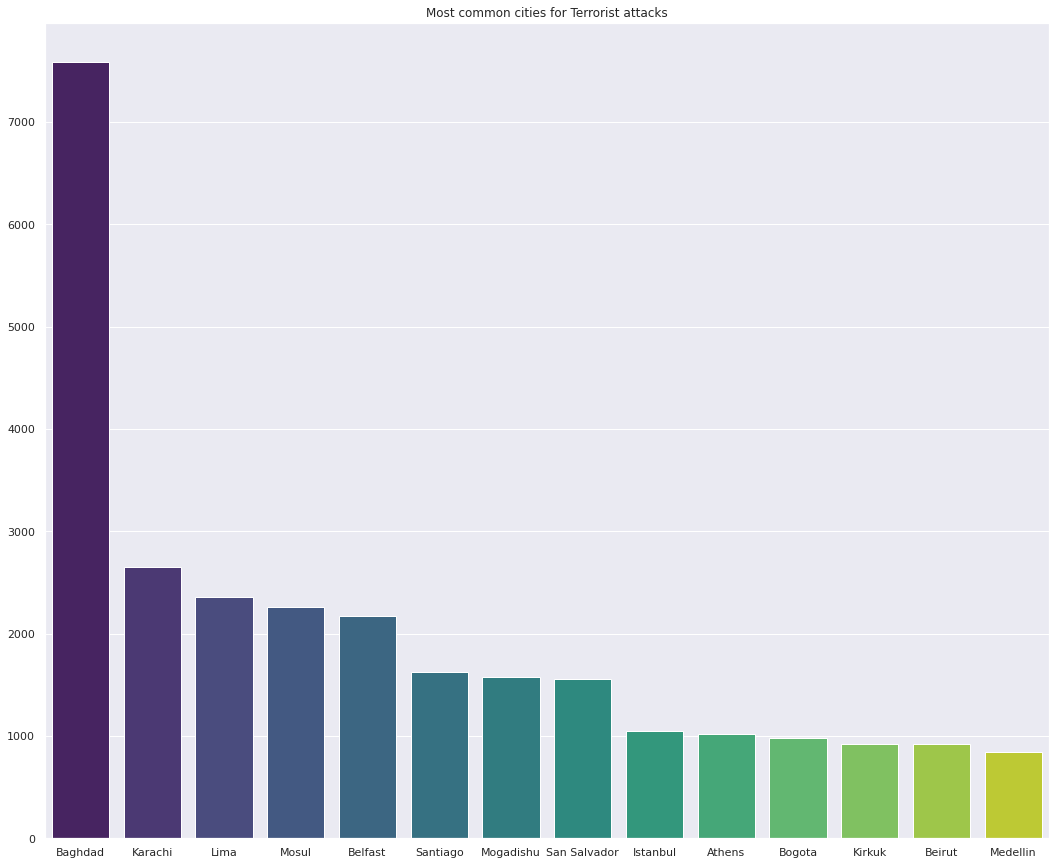

In [ ]:
cities = df1['City'].value_counts().sort_values(ascending=False)[1:15]
sns.barplot(x=cities.index,y=cities.values,data=df1,palette='viridis')
plt.title('Most common cities for Terrorist attacks')
plt.show()

Baghdad has an astoundingly high number of incidents.

<h3> Plotting Top 5 Indian cities with most incidents </h3>

In [ ]:
filter = df1[df1['Country']=='India']
filter = filter[['City','Latitude','Longitude']]
filter = filter[filter['City']!='Unknown']
filter = filter.drop_duplicates(subset=None, keep='first', inplace=False)
indian_df = pd.DataFrame({'City':filter['City'].value_counts().index,
   'value':filter['City'].value_counts().values})
#indian_df.head()
data = [
    {
        'x': indian_df['City'][:5].values,
        'y': indian_df['value'][:5].values,
        'mode': 'markers',
        'marker': {
            'sizemode': 'area',
            'size': indian_df['value'][:5]
              }
    }
]
iplot(data)

In [ ]:
City_State_india = pd.merge(indian_df, filter, how='left', left_on='City', right_on='City')
City_State_india = City_State_india.drop_duplicates(subset='City', keep='first', inplace=False)
count = City_State_india['value'].values
m = folium.Map(location=[28,81], tiles="cartodbpositron", zoom_start=5)
for i in range(0,5):
   folium.Circle(
      location=[City_State_india.iloc[i]['Latitude'], City_State_india.iloc[i]['Longitude']],
      popup=City_State_india.iloc[i]['City'],
      radius=int(count[i])*1200,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

<h3> Plotting Top 5 Iraqi cities with most incidents </h3>

In [ ]:
filter = df1[df1['Country']=='Iraq']
filter = filter[['City','Latitude','Longitude']]
filter = filter[filter['City']!='Unknown']
filter = filter.drop_duplicates(subset=None, keep='first', inplace=False)
iraq_df = pd.DataFrame({'City':filter['City'].value_counts().index,
   'value':filter['City'].value_counts().values})
data = [
    {
        'x': iraq_df['City'][:5].values,
        'y': iraq_df['value'][:5].values,
        'mode': 'markers',
        'marker': {
            'sizemode': 'area',
            'size': iraq_df['value'][:5]
              }
    }
]
iplot(data)

In [ ]:
City_State_iraq = pd.merge(iraq_df, filter, how='left', left_on='City', right_on='City')
City_State_iraq = City_State_iraq.drop_duplicates(subset='City', keep='first', inplace=False)
count = City_State_iraq['value'].values
m = folium.Map(location=[33,43], tiles="cartodbpositron", zoom_start=5)
for i in range(0,5):
   folium.Circle(
      location=[City_State_iraq.iloc[i]['Latitude'], City_State_iraq.iloc[i]['Longitude']],
      popup=City_State_iraq.iloc[i]['City'],
      radius=int(count[i])*400,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

<h3>Plotting Top 5 Columbian cities with most incidents</h3>

In [ ]:
filter = df1[df1['Country']=='Colombia']
filter = filter[['City','Latitude','Longitude']]
filter = filter[filter['City']!='Unknown']
filter = filter.drop_duplicates(subset=None, keep='first', inplace=False)
colombia_df = pd.DataFrame({'City':filter['City'].value_counts().index,
   'value':filter['City'].value_counts().values})
data = [
    {
        'x': colombia_df['City'][:5].values,
        'y': colombia_df['value'][:5].values,
        'mode': 'markers',
        'marker': {
            'sizemode': 'area',
            'size': colombia_df['value'][:5]
              }
    }
]
iplot(data)

In [ ]:
City_State_colombia = pd.merge(colombia_df, filter, how='left', left_on='City', right_on='City')
City_State_colombia = City_State_colombia.drop_duplicates(subset='City', keep='first', inplace=False)
count = City_State_colombia['value'].values
m = folium.Map(location=[4,-74], tiles="cartodbpositron", zoom_start=5)
for i in range(0,5):
   folium.Circle(
      location=[City_State_colombia.iloc[i]['Latitude'], City_State_colombia.iloc[i]['Longitude']],
      popup=City_State_colombia.iloc[i]['City'],
      radius=int(count[i])*800,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

<h3>Plotting Top 5 American cities with most incidents</h3>

In [ ]:
filter = df1[df1['Country']=='United States']
filter = filter[['City','Latitude','Longitude']]
filter = filter[filter['City']!='Unknown']
filter = filter.drop_duplicates(subset=None, keep='first', inplace=False)
usa_df = pd.DataFrame({'City':filter['City'].value_counts().index,
   'value':filter['City'].value_counts().values})
data = [
    {
        'x': usa_df['City'][:5].values,
        'y': usa_df['value'][:5].values,
        'mode': 'markers',
        'marker': {
            'sizemode': 'area',
            'size': usa_df['value'][:5]
              }
    }
]
iplot(data)

In [ ]:
City_State_usa = pd.merge(usa_df, filter, how='left', left_on='City', right_on='City')
City_State_usa = City_State_usa.drop_duplicates(subset='City', keep='first', inplace=False)
count = City_State_usa['value'].values
m = folium.Map(location=[37,-95], tiles="cartodbpositron", zoom_start=5)
for i in range(0,5):
   folium.Circle(
      location=[City_State_usa.iloc[i]['Latitude'], City_State_usa.iloc[i]['Longitude']],
      popup=City_State_usa.iloc[i]['City'],
      radius=int(count[i])*1100,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

<h3>Plotting Top 5 British/Irish cities with most incidents</h3>

In [ ]:
filter = df1[df1['Country']=='United Kingdom']
filter = filter[['City','Latitude','Longitude']]
filter = filter[filter['City']!='Unknown']
filter = filter.drop_duplicates(subset=None, keep='first', inplace=False)
uk_df = pd.DataFrame({'City':filter['City'].value_counts().index,
   'value':filter['City'].value_counts().values})
data = [
    {
        'x': uk_df['City'][:5].values,
        'y': uk_df['value'][:5].values,
        'mode': 'markers',
        'marker': {
            'sizemode': 'area',
            'size': uk_df['value'][:5]
              }
    }
]
iplot(data)

In [ ]:
City_State_uk = pd.merge(uk_df, filter, how='left', left_on='City', right_on='City')
City_State_uk = City_State_uk.drop_duplicates(subset='City', keep='first', inplace=False)
count = City_State_uk['value'].values
m = folium.Map(location=[55,-3], tiles="cartodbpositron", zoom_start=5)
for i in range(0,5):
   folium.Circle(
      location=[City_State_uk.iloc[i]['Latitude'], City_State_uk.iloc[i]['Longitude']],
      popup=City_State_uk.iloc[i]['City'],
      radius=int(count[i])*800,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

<h2> Some Analysis on motive behind attacks </h2>

<h3>Iraq</h3>

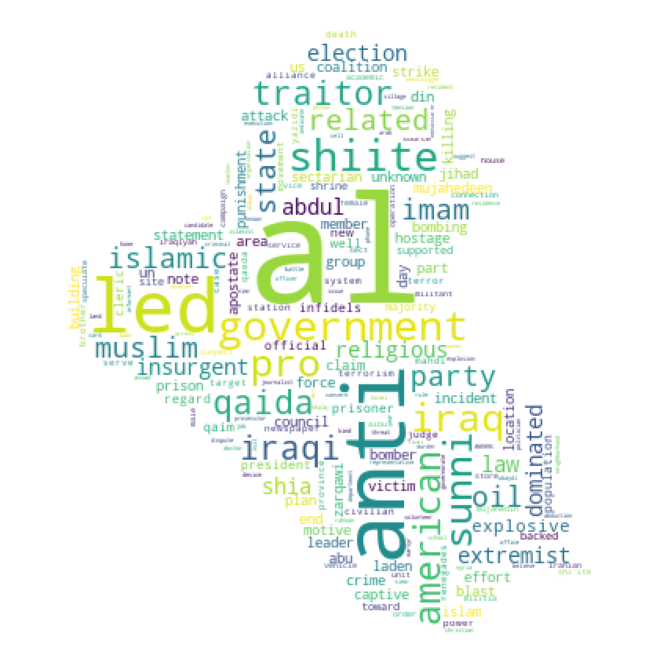

In [ ]:
iraq_mask = np.array(Image.open('/content/drive/My Drive/istockphoto-942897670-170667a.jpg'))

df_country = df1[df1['Country'] == 'Iraq']
country_motive = df_country['Motive'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(country_motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',mask=iraq_mask).generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(15,12)
plt.axis('off')
plt.show()

<h3> India </h3>

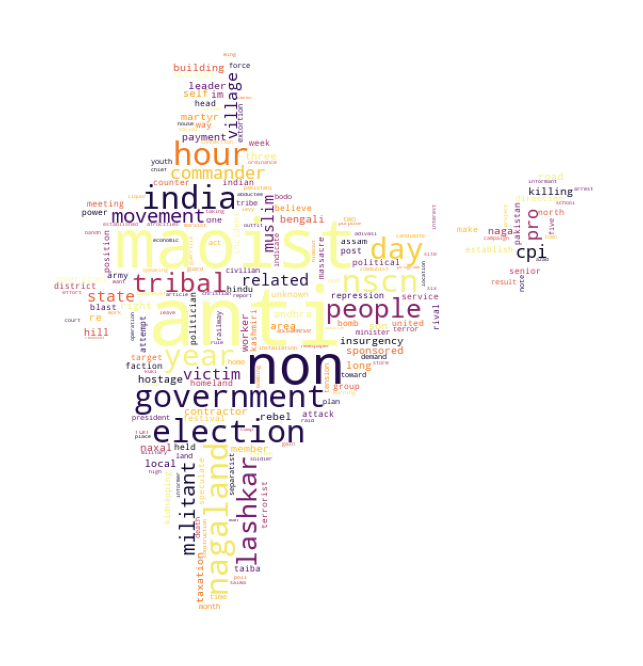

In [ ]:
india_mask = np.array(Image.open('/content/drive/My Drive/istockphoto-933497804-612x612.jpg'))

df_country = df1[df1['Country'] == 'India']
country_motive = df_country['Motive'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(country_motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',mask=india_mask,colormap='inferno').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(15,12)
plt.axis('off')
plt.show()

<h3> USA </h3>

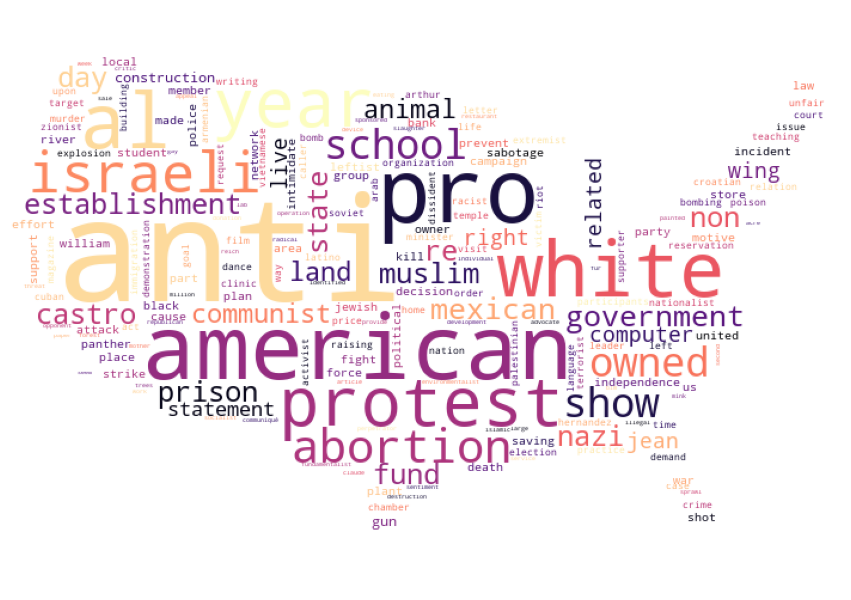

In [ ]:
usa_mask = np.array(Image.open('/content/drive/My Drive/us-map-silhouette-vector.jpg'))

df_country = df1[df1['Country'] == 'United States']
country_motive = df_country['Motive'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(country_motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',mask=usa_mask,colormap='magma').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(15,12)
plt.axis('off')
plt.show()

<h3> UK</h3>

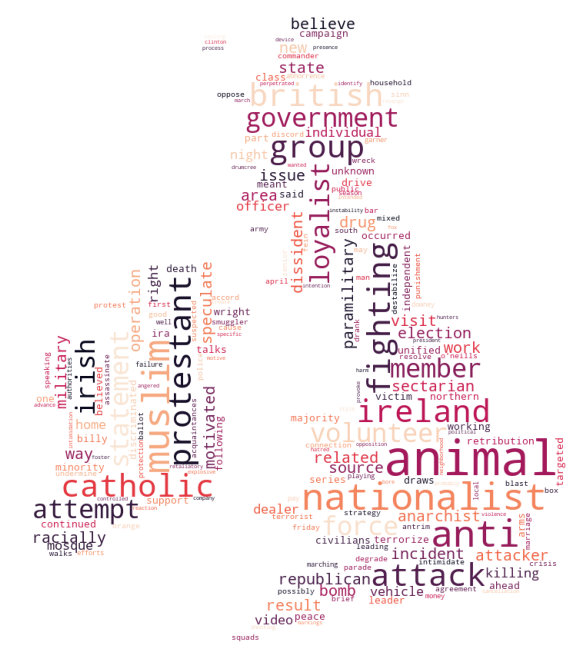

In [ ]:
uk_mask = np.array(Image.open('/content/drive/My Drive/uk-silhouette.jpg'))

df_country = df1[df1['Country'] == 'United Kingdom']
country_motive = df_country['Motive'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(country_motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',mask=uk_mask,colormap='rocket').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(15,12)
plt.axis('off')
plt.show()

<h3> Terror attacks timeline

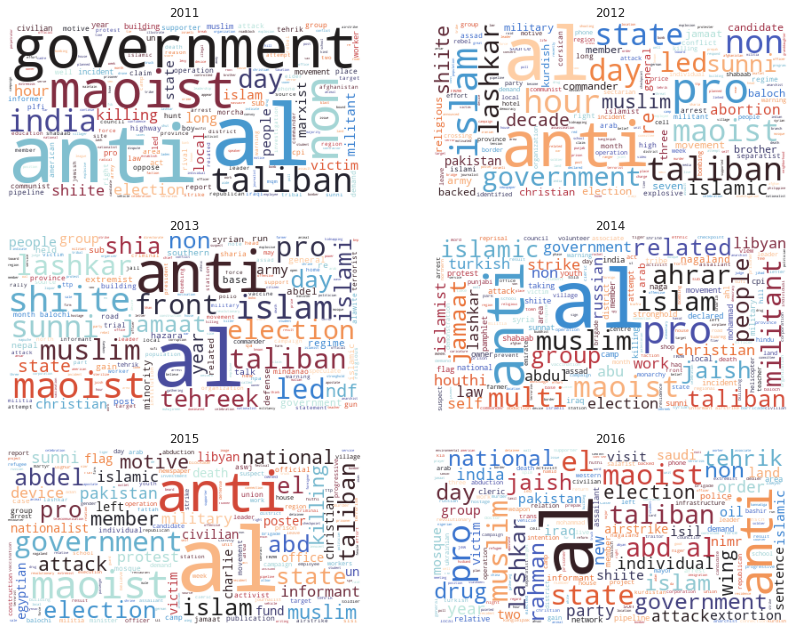

In [ ]:
years = [2011,2012,2013,2014,2015,2016]
plt.figure(figsize=(14,15))
gs = gridspec.GridSpec(4, 2)
for i, cn in enumerate(years):
    ax = plt.subplot(gs[i])
    df_country = df1[df1['Year'] == cn]
    country_motive = df_country['Motive'].str.lower().str.cat(sep=' ')
    words=nltk.tokenize.word_tokenize(country_motive)
    word_dist = nltk.FreqDist(words)
    stopwords = nltk.corpus.stopwords.words('english')
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',colormap='icefire').generate(" ".join(words_except_stop_dist))
    ax.imshow(wordcloud)
    ax.set_title(str(cn))
    ax.axis('off')

<h1> Observations  </h1>
<p>
The countries with most reported crimes are <b>Iraq, Afghanistan, India, Pakistan and Colombia </b>. The top regions are <b> North Africa and the middle East</b> and <b> South Asia </b>. Everything mentioned until now comes under <i>underdeveloped or developing</i> categories. The conclusion can be drawn that underdeveloped regions have vastly uneducated population, corrupt governments and weak law and enforcement. These could be attributed as the reason for the high crime rate in these regions. 
</p>
<p>
Further it can be noted that - 
<ul>
<li> Taliban has been the most active terrorist organisation followed by ISIL.</li>
<li>The most common types of attacks are bombings and explosions.</li>
<li>The most common target types are Citizens and public property followed by Governments.</li>
</ul>
</p>
<p>
By Word Cloud we can see Maosit ,Governemant, white, Protest are main resons for the attacks. From sentimental analysis, the most frequent word observed are " muslims","islamic". It is common belief that terrorists are muslims but no data validates the point. The terror attacks and incidents in the UK would have a major contribution from <i>The Troubles</i> as <i>Ireland and Irish</i> are some words that can be seen in the wordcloud.  
</p>
<p> Over the years, the motives behind the attacks remains more or less the same but there has been a steep rise in the number of incidents over the years. 
</p>

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [ ]:
#*********************************************************************************************************************************